In [20]:
import pandas as pd
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
data.shape

(303, 14)

In [22]:
data.size

4242

In [23]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

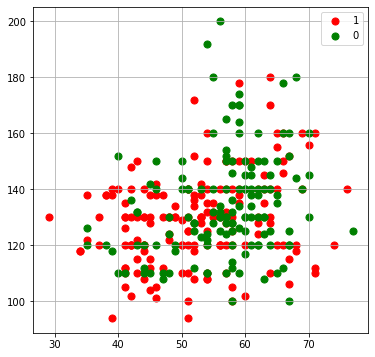

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
targets=[1,0]
colors=['r','g']
for target,color in zip(targets,colors):
    i=data['target']==target
    ax.scatter(data.loc[i,'age'],data.loc[i,'trestbps'],c=color,s=50)
ax.legend(targets)
ax.grid()

In [25]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [27]:
X_train.shape

(227, 13)

In [28]:
X_test.shape

(76, 13)

In [29]:
from sklearn.svm import SVC 
clf=SVC(kernel='rbf')  
clf.fit(X_train,y_train)

SVC()

In [30]:
y_pred=clf.predict(X_test)

In [31]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

,Actual,Prediction
179,0,0
228,0,1
111,1,1
246,0,1
60,1,0
...,...,...
22,1,1
258,0,1
56,1,1
242,0,0


In [32]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,y_pred)*100
print(cm)

69.73684210526315


NameError: name 'X_train_std' is not defined